# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\giusa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [48]:
def rolling(x,y):
    return np.random.randint(1,6,size = 10)
    

In [49]:
rolling_df = pd.DataFrame(rolling(6,10))

In [51]:
rolling_df

,0
0,2
1,3
2,5
3,5
4,4
5,5
6,4
7,2
8,3
9,3


#### 2.- Plot the results sorted by value.

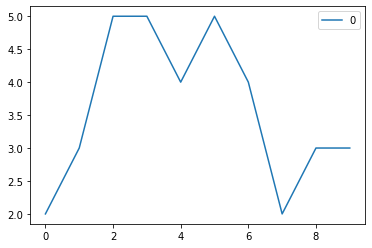

In [52]:
rolling_df.plot()
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

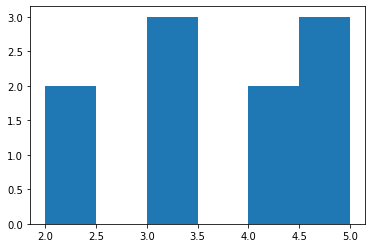

In [53]:
plt.hist(rolling_df, bins=6)
plt.show()

In [7]:
"""
The number of occurences in the 1st plot is in the x axis and in the hist is in the y axis
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [54]:
# your code here
def mean(data):
    return sum(data)/len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [58]:
# your code here
def freq(values):
   
    freq_dist = {}
    for x in values:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
            
    return freq_dist, sum([k*v for k, v in freq_dist.items()])/sum([v for k, v in freq_dist.items()])

freq_dist, mean_from_freq = freq(rolling(6,10))

print(mean_from_freq)


3.2


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [59]:
# your code here
def median(value):
    if len(value) % 2 == 0:
        return sum(value[int(len(value)/2)-1:int(len(value)/2)+1])/2
    
    else:
        return value[int(len(value)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [60]:
# your code here
def quartiles(values):
    
    half = median(values)
    
    if len(vals) % 2 == 0:
        first_quartile = median(vals[:int(len(vals)/2)])
        third_quartile = median(vals[int(len(vals)/2):])
    
    else:
        first_quartile = median(vals[:int(len(vals)/2)-1])
        third_quartile = median(vals[int(len(vals)/2)+1:])
    
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

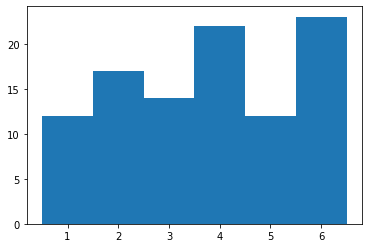

In [61]:
# your code here
dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_values = sorted(dice_df['value'])
plt.hist(dice_values, bins=6, range= (0.5, 6.5))
plt.show()

In [62]:
"""
Number 6 seems to be the mode of the distribution
"""

'\nNumber 6 seems to be the mode of the distribution\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [66]:
# your code here
mean(dice_values)

3.74

#### 3.- Now, calculate the frequency distribution.


In [65]:
# your code here
freq(dice_values)

({1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}, 3.74)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

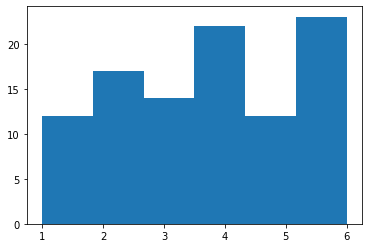

In [67]:
# your code here
plt.hist(dice_values, bins=6)
plt.show()

In [68]:
"""
we seem to have more rolls from 4 onwards, which would increase the mean 
"""

'\nwe seem to have more rolls from 4 onwards, which would increase the mean \n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

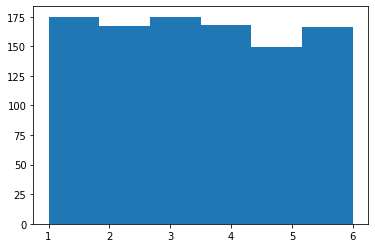

In [69]:
# your code here
thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
plt.hist(thousand['value'], bins= 6)
plt.show()

In [19]:
"""
when we increase the number of attempts, we seem to have a more uniform distribution
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

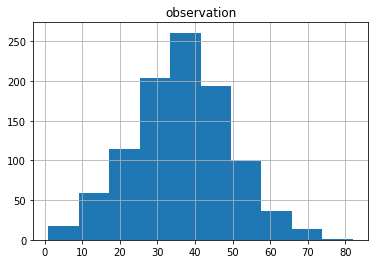

In [70]:
# your code here
ages1 = pd.read_csv('../data/ages_population.csv')
ages1.hist()
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [72]:
# your code here
ages1.observation.mean()


36.56

In [73]:
ages1.observation.std()

12.816499625976762

In [22]:
"""
The mean was more easier to guess, between 30 and 40. 
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

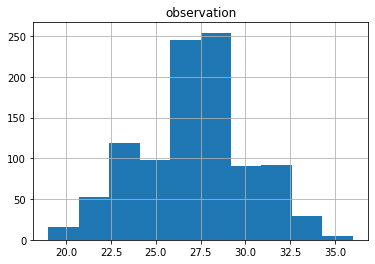

In [74]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.hist()
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [75]:
"""
yes, on the last plot the ages goes until 36, as on the 1st one, it went until 80
"""

'\nyes, on the last plot the ages goes until 36, as on the 1st one, it went until 80\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [76]:
# your code here
ages2.observation.mean()

27.155

In [77]:
ages2.observation.std()

2.969813932689186

In [78]:
"""
this 2nd poll corresponds to a younger neighbourhood, as the values goes until 36 it was unlikely that the mean
would be similiar to the last one that has a bigger range of age 
"""

'\nthis 2nd poll corresponds to a younger neighbourhood, as the values goes until 36 it was unlikely that the mean\nwould be similiar to the last one that has a bigger range of age \n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

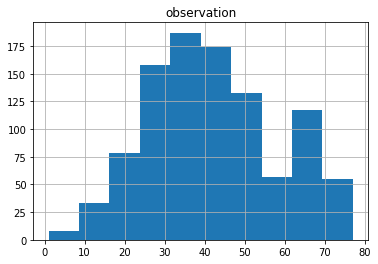

In [80]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [81]:
# your code here
ages3.observation.mean()

41.989

In [82]:
ages3.observation.std()

16.144705959865934

In [83]:
"""
The results are similar to plot 1 then plot 2
"""

'\nThe results are similar to plot 1 then plot 2\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [84]:
# your code here
print(ages3.observation.quantile(.25))
print(ages3.observation.quantile(.5))
print(ages3.observation.quantile(.75))

30.0
40.0
53.0


In [31]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [85]:
# your code here
print(ages3.observation.quantile(.25))
print(ages3.observation.quantile(.5))
print(ages3.observation.quantile(.75))
print(ages3.observation.quantile(.90))

30.0
40.0
53.0
67.0


In [33]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here

In [35]:
"""
your comments here
"""

'\nyour comments here\n'